<a href="https://colab.research.google.com/github/EleonoraBartolomucci/Fairness/blob/master/Esperimenti/primoEsperimentoMiky_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

29.459588713534195


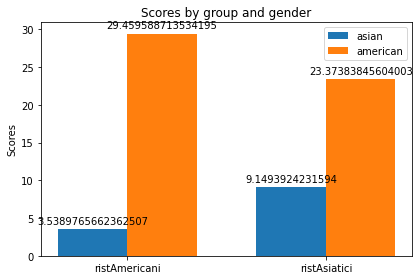

In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
from google.colab import auth
import json
import pandas as pd
import csv
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

sort = 'Random'

# file con i dati di tutti i ristoranti ordinati per sorting
relevance = '1nwGbyk8q2S-0BkLcyFVqdK6emTooxHJv'  # FILE ID, got on google drive with condivision link
download = drive.CreateFile({'id': relevance})
download.GetContentFile('AllRestaurant_' + '%s' % sort + '_Analysis.csv')

res = pd.read_csv('AllRestaurant_' + '%s' % sort + '_Analysis.csv')

#res_agg = res.groupby(['restaurant','ethnicity']).count()[['user_id']]    #agg({'user_id':count})
#res_agg = res[res['restaurant'] == 'TupeloHoney'].groupby('ethnicity').count() 


totaleTupelo = len(res[(res['restaurant'] == 'TupeloHoney')])
#positivi
asianTupelo = (len(res[(res['restaurant'] == 'TupeloHoney') & (res['ethnicity'] == 'asian') & (res['review_sentiment'] == 'positive')]) * 100) / totaleTupelo
messicanTupelo = (len(res[(res['restaurant'] == 'TupeloHoney') & (res['ethnicity'] == 'hispanic, latino, or spanish origin') & (res['review_sentiment'] == 'positive')]) * 100) / totaleTupelo
americanTupelo = ((len(res[((res['restaurant'] == 'TupeloHoney') & (res['ethnicity'] == 'black or african american') & (res['review_sentiment'] == 'positive')) | 
                          ((res['restaurant'] == 'TupeloHoney') & (res['ethnicity'] == 'white') & (res['review_sentiment'] == 'positive'))])) * 100) / totaleTupelo

totaleHarumi = len(res[(res['restaurant'] == 'HarumiSushi')])
asianHarumi = (len(res[(res['restaurant'] == 'HarumiSushi') & (res['ethnicity'] == 'asian') & (res['review_sentiment'] == 'positive')]) * 100) / totaleHarumi
messicanHarumi = (len(res[(res['restaurant'] == 'HarumiSushi') & (res['ethnicity'] == 'hispanic, latino, or spanish origin') & (res['review_sentiment'] == 'positive')]) * 100) / totaleHarumi
americanHarumi = ((len(res[((res['restaurant'] == 'HarumiSushi') & (res['ethnicity'] == 'black or african american') & (res['review_sentiment'] == 'positive')) | 
                          ((res['restaurant'] == 'HarumiSushi') & (res['ethnicity'] == 'white') & (res['review_sentiment'] == 'positive'))])) * 100) / totaleHarumi

print(americanTupelo)

labels = ['ristAmericani', 'ristAsiatici']
asian = [asianTupelo, asianHarumi] 
american = [americanTupelo, americanHarumi]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, asian, width, label='asian')
rects2 = ax.bar(x + width/2, american, width, label='american')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

#restaurant.plot(kind='bar',x='name',y='num_children',ax=ax)
#restaurant.groupby('ethnicity')['user_id'].nunique().plot(kind='bar')

#restaurant.assign(dummy = 1).groupby(['ethnicity','restaurant']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).to_frame().unstack().plot(kind='bar',stacked=True,legend=True)
#plt.bar(x1,y1)
#plt.xlabel('etnia')

# disable ticks in the x axis
#plt.xticks([])

# fix the legend or it'll include the dummy variable
#current_handles, _ = plt.gca().get_legend_handles_labels()
#reversed_handles = reversed(current_handles)
#correct_labels = reversed(restaurant['restaurant'].unique())

#plt.legend(reversed_handles,correct_labels)

